## Exploratory Data Analysis & Intro

### Goal
- Investigate top-paying roles and skills in the data science industry.
- Use Python to explore a real-live dataset on job postings.
- For job-seekers: use these insights to help find the best job opportunities.

This project focuses on Data Analyst roles based in India.

### Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Exploratory Data Analysis for all Data Roles

### Roles to Explore

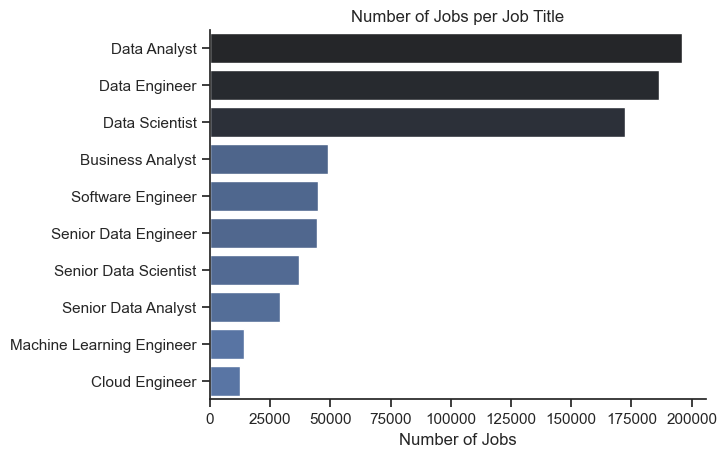

In [9]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to Explore

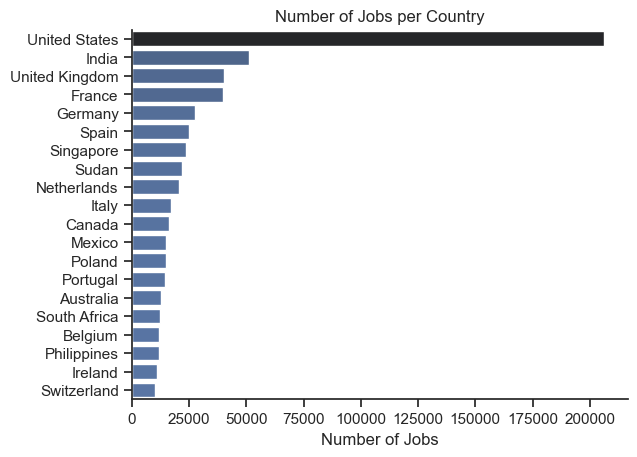

In [10]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to Explore

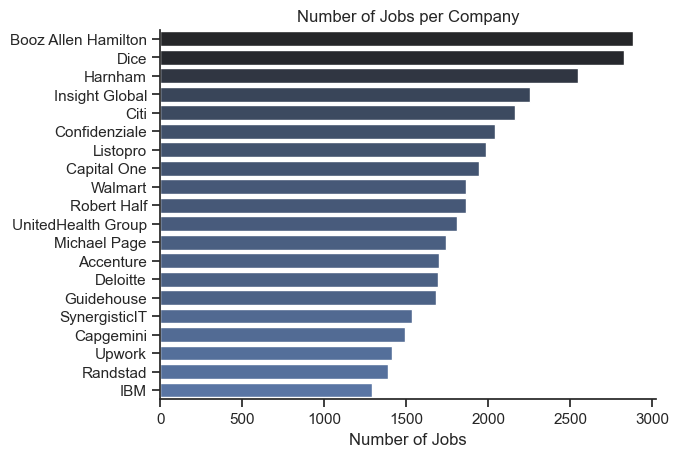

In [11]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Exploratory Data Analysis for Data Analysts in India

### Filter for Indian Data Analyst roles 

In [6]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

### Locations to Explore

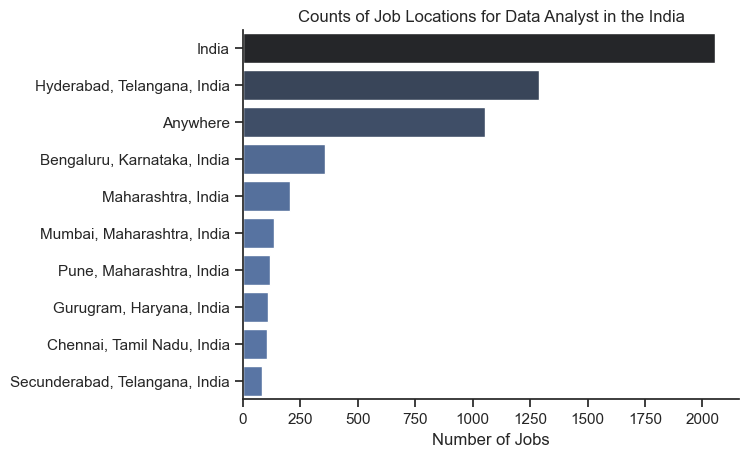

In [8]:
df_plot = df_DA_IND['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()     # remove the border around the plot.
plt.title('Counts of Job Locations for Data Analyst in the India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job opportunities

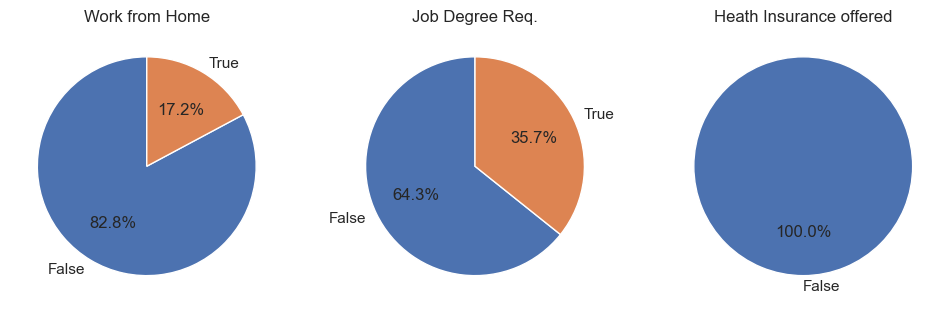

In [34]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

dict_column = {
    'job_work_from_home' : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Req.',
    'job_health_insurance' : 'Heath Insurance offered'
}

for i, (column,title) in enumerate(dict_column.items()):
    counts = df_DA_IND[column].value_counts()
    labels = counts.index.astype(str)
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)


plt.show()

### Companies to Explore

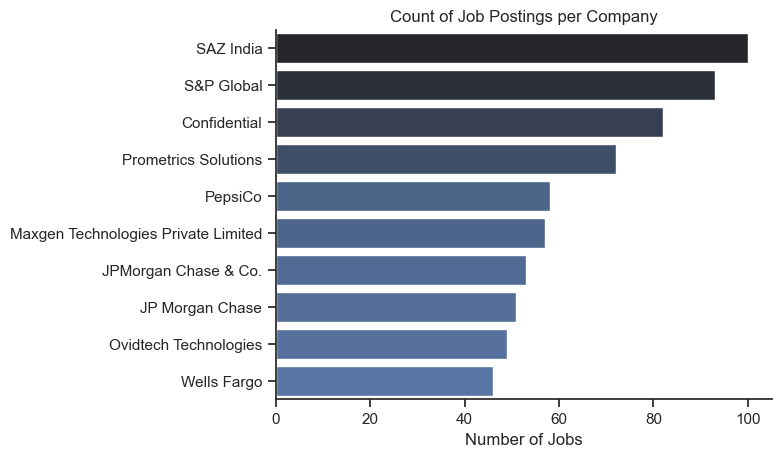

In [37]:
df_plot = df_DA_IND['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()     # remove the border around the plot.
plt.title('Count of Job Postings per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Findings:
- In this dataset, when I filtered job postings for "Data Analyst" roles in India,
- I created a pie chart to analyze whether these postings offer health insurance.
- The chart showed that 100% of the values were marked as 'False'.
- This indicates that, in this dataset, either:
  - Health insurance is not offered, or
  - It is not explicitly mentioned in the job postings.